Solution took 0.004 sec
[  324.95596847 -4566.1837821      0.          -324.95596847
 -5433.8162179  -2169.08108951]


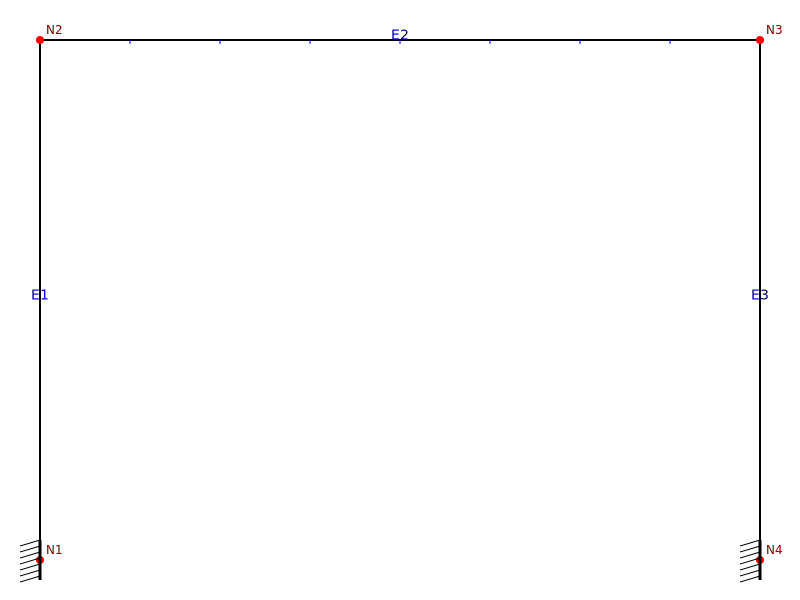

In [6]:
import sys
sys.path.append("/home/bp/devel")

from PyFrame import (
    Domain, Solver,
    Material, CrossSection, Node, Beam2D, DofID,
    UniformDistributedLoad,
    plot_model_drawsvg, plot_model_diagram,
)


# solver
sol = Solver()
dom = sol.domain

# material and section
mat = Material("C30", e=30e9, g=12e9)
cs = CrossSection("rect", a=0.3*0.5, iy=0.3*0.5**3/12, k=1.0e32, rho=25e3)
dom.add_material(mat)
dom.add_cs(cs)

# nodes
n1 = Node(1, dom, coords=[0.0, 0.0, 0.0], bcs=[DofID.Dx, DofID.Dz, DofID.Ry])
n2 = Node(2, dom, coords=[0.0, 0.0, -5.0])
n3 = Node(3, dom, coords=[5.0, 0.0, -5.0])
n4 = Node(4, dom, coords=[5.0, 0.0, 0.0], bcs=[DofID.Dx, DofID.Dz, DofID.Ry])
dom.add_node(n1)
dom.add_node(n2)
dom.add_node(n3)
dom.add_node(n4)

# element
e1 = Beam2D(1, dom, nodes=[1, 2], mat="C30", cs="rect", hinges=(False, False))
e2 = Beam2D(2, dom, nodes=[2, 3], mat="C30", cs="rect", hinges=(True, False))
e3 = Beam2D(3, dom, nodes=[3, 4], mat="C30", cs="rect", hinges=(False, False))
dom.add_element(e1)
dom.add_element(e2)
dom.add_element(e3)

# loads
udl = UniformDistributedLoad(w=2000.0)  # N/m
dom.apply_element_load(2, udl)

# solve
sol.solve()
print (e2._end_forces_local())

# SVG outputs
plot_model_drawsvg(dom, "simple_beam_model.svg")
#plot_model_diagram(dom, "V", "simple_beam_shear.svg")



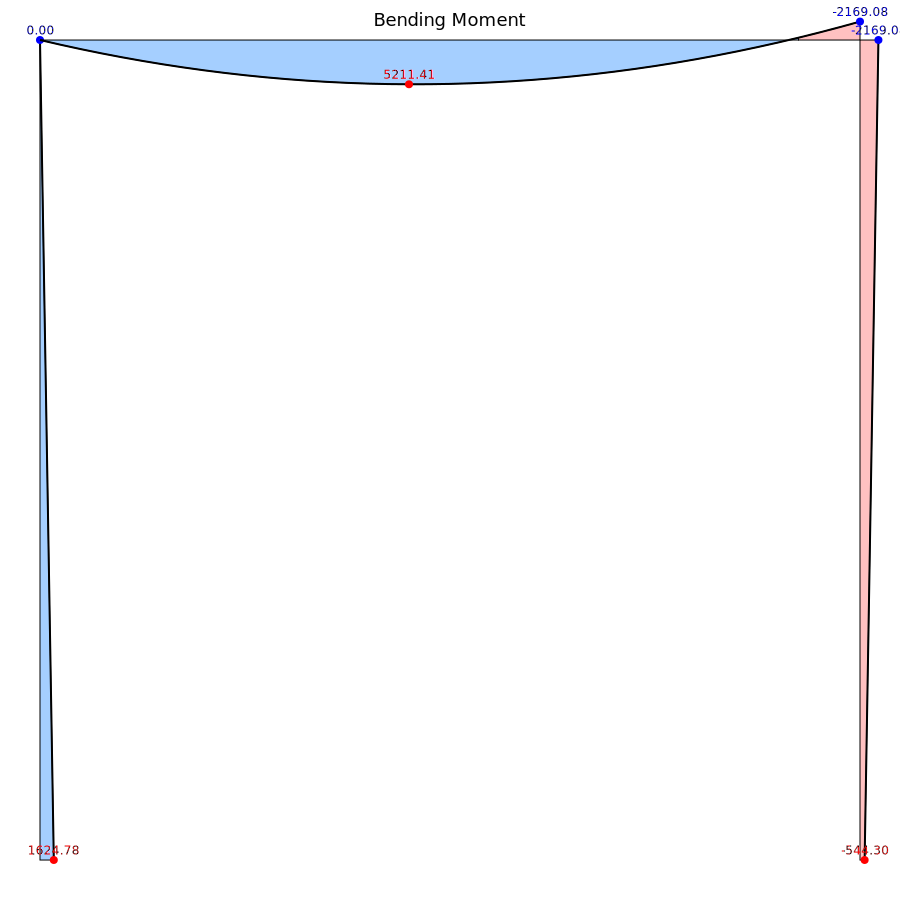

In [7]:
plot_model_diagram(dom, "M", "simple_beam_moment.svg", scale=0.001)


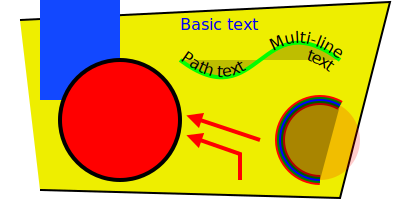

In [3]:
import drawsvg as draw

d = draw.Drawing(200, 100, origin='center')

# Draw an irregular polygon
d.append(draw.Lines(-80, 45,
                     70, 49,
                     95, -49,
                    -90, -40,
                    close=False,
            fill='#eeee00',
            stroke='black'))

# Draw a rectangle
r = draw.Rectangle(-80, -50, 40, 50, fill='#1248ff')
r.append_title("Our first rectangle")  # Add a tooltip
d.append(r)

# Draw a circle
d.append(draw.Circle(-40, 10, 30,
        fill='red', stroke_width=2, stroke='black'))

# Draw an arbitrary path (a triangle in this case)
p = draw.Path(stroke_width=2, stroke='lime', fill='black', fill_opacity=0.2)
p.M(-10, -20)  # Start path at point (-10, -20)
p.C(30, 10, 30, -50, 70, -20)  # Draw a curve to (70, -20)
d.append(p)

# Draw text
d.append(draw.Text('Basic text', 8, -10, -35, fill='blue'))  # 8pt text at (-10, -35)
d.append(draw.Text('Path text', 8, path=p, text_anchor='start', line_height=1))
d.append(draw.Text(['Multi-line', 'text'], 8, path=p, text_anchor='end', center=True))

# Draw multiple circular arcs
d.append(draw.ArcLine(60, 20, 20, 60, 270,
        stroke='red', stroke_width=5, fill='red', fill_opacity=0.2))
d.append(draw.Arc(60, 20, 20, 90, -60, cw=True,
        stroke='green', stroke_width=3, fill='none'))
d.append(draw.Arc(60, 20, 20, -60, 90, cw=False,
        stroke='blue', stroke_width=1, fill='black', fill_opacity=0.3))

# Draw arrows
arrow = draw.Marker(-0.1, -0.51, 0.9, 0.5, scale=4, orient='auto')
arrow.append(draw.Lines(-0.1, 0.5, -0.1, -0.5, 0.9, 0, fill='red', close=True))
p = draw.Path(stroke='red', stroke_width=2, fill='none',
        marker_end=arrow)  # Add an arrow to the end of a path
p.M(20, 40).L(20, 27).L(0, 20)  # Chain multiple path commands
d.append(p)
d.append(draw.Line(30, 20, 0, 10,
        stroke='red', stroke_width=2, fill='none',
        marker_end=arrow))  # Add an arrow to the end of a line

d.set_pixel_scale(2)  # Set number of pixels per geometry unit
#d.set_render_size(400, 200)  # Alternative to set_pixel_scale
#d.save_svg('example.svg')
#d.save_png('example.png')

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG
d
d